# EVALUATE ON TEST SET-- EXERCISE

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the CIFAR dataset -- check the size carefully!

In [8]:
train_data=torch.load('../../data/cifar/train_data.pt')
train_label=torch.load('../../data/cifar/train_label.pt')
test_data=torch.load('../../data/cifar/test_data.pt')
test_label=torch.load('../../data/cifar/test_label.pt')

print(train_data.size())
print(test_data.size())

torch.Size([50000, 3, 32, 32])
torch.Size([10000, 3, 32, 32])


### Make a ONE layer net class. 

In [3]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=True)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net. 

In [4]:
net=one_layer_net(3072,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=3072, out_features=10, bias=True)
)


### Choose the criterion and optimizer. Also choose:


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer=torch.optim.SGD( net.parameters() , lr=0.01 )
bs=20

### Do 30 passes through the training set.

In [6]:
for epoch in range(30):
    
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(50000)
 
    for count in range(0,50000,bs):
    
        # Set the gradients to zeros
        optimizer.zero_grad()
        
        # create a minibatch       
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        # reshape the minibatch
        inputs = minibatch_data.view(bs,3072)

        # tell Pytorch to start tracking all operations that will be done on "inputs"
        inputs.requires_grad_()

        # forward the minibatch through the net 
        scores=net( inputs ) 

        # Compute the average of the losses of the data points in the minibatch
        loss =  criterion( scores , minibatch_label) 
        
        # backward pass to compute dL/dU, dL/dV and dL/dW   
        loss.backward()

        # do one step of stochastic gradient descent: U=U-lr(dL/dU), V=V-lr(dL/dU), ...
        optimizer.step()
        
        
        
        # START COMPUTING STATS
        
        num_batches+=1
        
        with torch.no_grad():
            
            running_loss += loss.item()

            error = utils.get_error( scores , minibatch_label)
            running_error += error.item() 
   


    
    # compute stats for the full training set
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    
    print('epoch=',epoch, '\t loss=', total_loss , '\t error=', total_error*100 ,'percent')
        
    

epoch= 0 	 loss= 1.9586951248645783 	 error= 69.3299999165535 percent
epoch= 1 	 loss= 1.863927068758011 	 error= 65.48999999523163 percent
epoch= 2 	 loss= 1.83846609082222 	 error= 64.24599994897842 percent
epoch= 3 	 loss= 1.8187357660770416 	 error= 63.19599994421006 percent
epoch= 4 	 loss= 1.8081702552795411 	 error= 62.99199997425079 percent
epoch= 5 	 loss= 1.8009916216373443 	 error= 62.55199996709824 percent
epoch= 6 	 loss= 1.7891970201492309 	 error= 62.023999998569494 percent
epoch= 7 	 loss= 1.7848970133543014 	 error= 61.99399995565415 percent
epoch= 8 	 loss= 1.7760169911146164 	 error= 61.45800000190735 percent
epoch= 9 	 loss= 1.7764958127975463 	 error= 61.434000027179714 percent
epoch= 10 	 loss= 1.7692970621824264 	 error= 61.050000019073494 percent
epoch= 11 	 loss= 1.7648942991733552 	 error= 61.08800002336502 percent
epoch= 12 	 loss= 1.7611085153818131 	 error= 60.81400005817413 percent
epoch= 13 	 loss= 1.760036501646042 	 error= 61.012000007629396 percent
epo

# You only have to complete this cell

### So we are doing around 59% error on the training set. BUT how much are we doing on test set?

In [10]:
running_error=0
num_batches=0

with torch.no_grad():

    for i in range(0,10000,bs): 

        # extract the minibatch
        minibatch_data =  test_data[i:i+bs]
        minibatch_label=  test_label[i:i+bs]

        # reshape the minibatch
        inputs = minibatch_data.view(bs,3072)
        # feed it to the network
        scores= net(inputs)

        # compute the error made on this batch
        error = utils.get_error(scores, minibatch_label)

        # add it to the running error
        running_error +=  error.item()

        num_batches+=1


# compute error rate on the full test set
total_error = running_error/num_batches

print( 'error rate on test set =', total_error*100 ,'percent')

error rate on test set = 62.48999987840652 percent


### Choose image at random from the test set and see how good/bad are the predictions

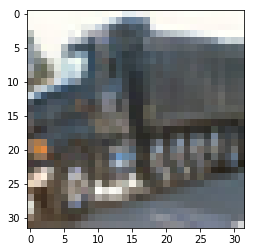

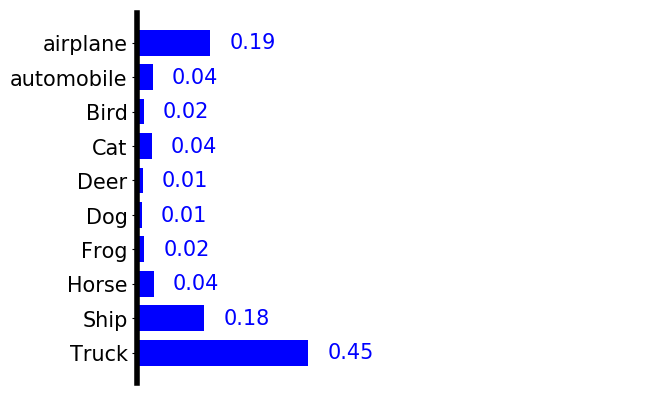

In [11]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,3072)) 
probs= F.softmax(scores, dim=1)
utils.show_prob_cifar(probs)